In [137]:
from graph_tool.all import *
import numpy as np
from re import search, sub
from textwrap import fill

In [138]:
PATH = "split-0.dag" #input file
GRAPH_DATA = "graph.txt" #output file

In [139]:
def parse_file():
    with open(PATH, 'r') as f:
        with open(GRAPH_DATA, 'w') as f2:
            for line in f:
                if line.startswith(('PARENT', 'CHILD')):
                    f2.write(line)
                    
parse_file()

In [140]:
def remove_data(graph_set):
    graph_set.remove('PARENT')
    graph_set.remove('CHILD')
    return graph_set

def create_empty_matrix():
    graph_set = set()
    with open(GRAPH_DATA, 'r') as f:
        for line in f:
            data = line.split()
            graph_set.update(data)
    graph_set = remove_data(graph_set)
    sez_size = len(graph_set)
    return np.zeros((sez_size, sez_size)), graph_set

In [141]:
def unique_dict_entry(graph_set):
    return {v:k for k, v in enumerate(graph_set)}

def create_adjacency_matrix(adjacency_matrix, dict_data):
    with open(GRAPH_DATA, 'r') as f:
        for line in f:
            parent = search(r'(?<=\bPARENT\s)(\s+\w+)', line).group()
            child = search(r'(?<=\bCHILD)(\s+\w+)', line).group()
            parent_id = dict_data.get(parent.strip())
            child_id = dict_data.get(child.strip())
            matrix[parent_id][child_id] = 1
    return adjacency_matrix

In [142]:
matrix, data = create_empty_matrix()
data = unique_dict_entry(data)
a_matrix = create_adjacency_matrix(matrix, data)

In [143]:
print(a_matrix)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


In [155]:
g = Graph()

def shorten_label(label):
    components = label.replace('0', "").split('_')
    
    return components[0] + "".join(x.title() for x in components[1:])

def transform_dict(data_dict, graph):
    transformed_dict = {}
    for key, val in data_dict.items():
        transformed_dict[val] = {'name': shorten_label(key),
                                 'vertex': graph.add_vertex()}
    return transformed_dict

vertex_dict = transform_dict(data, g)

In [156]:
def fill_graph(data_dict, a_matrix, graph):
    size = a_matrix.shape[0]
    vprop = graph.new_vertex_property("string")
    graph.vp.name = vprop
    try:
        for i in range(size):
            act_ver = data_dict[i]['vertex']
            graph.vp.name[act_ver] = data_dict[i]['name']
            for j in range(size):
                if a_matrix[i][j] == 1:
                    g.add_edge(act_ver, data_dict[j]['vertex'])
    except KeyError as e:
        print(e)

fill_graph(vertex_dict, a_matrix, g)

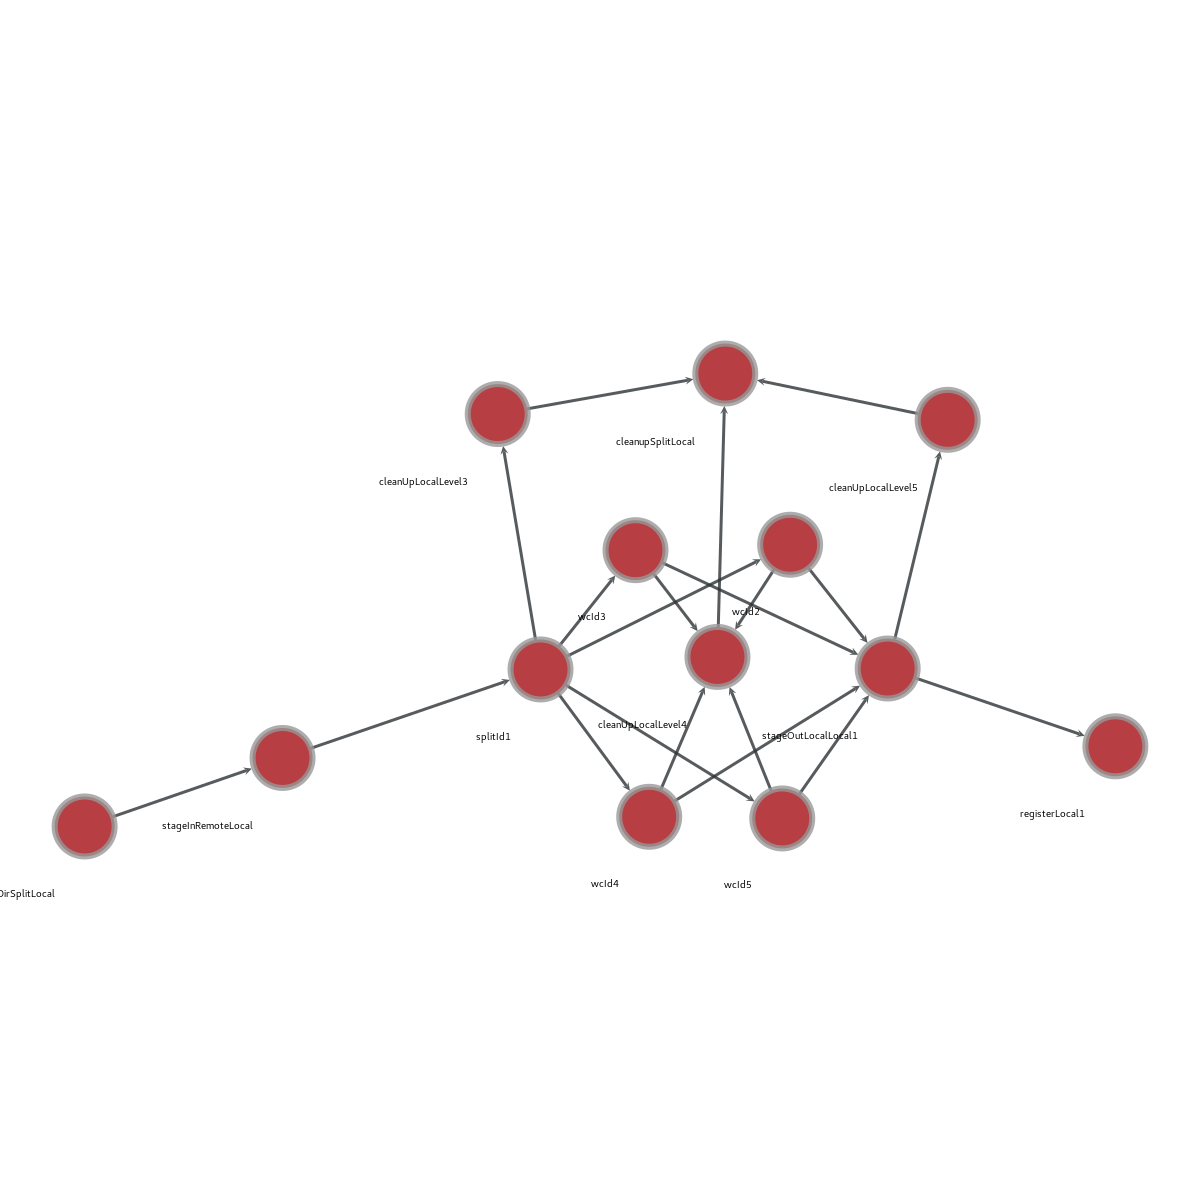

In [198]:
IMG_SIZE = (1200,1200)
VERTEX_SIZE = 60
EDGE_SIZE = 3
def draw_graph(graph):
    pos = sfdp_layout(graph)
    graph_draw(graph, 
               pos=pos,
               vertex_text=graph.vp.name,
               vertex_text_position=2,
               vertex_font_size=10,
               vertex_size=VERTEX_SIZE,
               edge_pen_width=EDGE_SIZE,
               output_size=IMG_SIZE,
               output="graph.png")
    
draw_graph(g)